# 主成分分析

主成分分析は学習データの分散が最大になる方向への線形変換を求める手法。

$D$次元のデータ$\boldsymbol{x}=(x_1, \cdots, x_D)^T$が$N$個あるとする。$i$番目の観測値を行ベクトル$\boldsymbol{x}_i$として表し、データを行列$X = (\boldsymbol{x}_1, \cdots, \boldsymbol{x}_N)^T$と表す。

各変数の平均のベクトル$\bar{\boldsymbol{x}}=(\bar{x}_1, ..., \bar{x}_D)^T$を引き算した行列を$\bar{\boldsymbol{X}}=(\boldsymbol{x}_1 - \bar{\boldsymbol{x}}, ..., \boldsymbol{x}_N - \bar{\boldsymbol{x}})^T$とおけば、共分散行列$\boldsymbol{\Sigma}$は

$$
\boldsymbol{\Sigma} = \operatorname{Var}[\bar{\boldsymbol{X}}]
= \frac{1}{N} \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}}
$$

で定義される。

係数ベクトル$\boldsymbol{a}_j = (a_{j1}, ..., a_{jD})^T \ (j=1, ..., D)$を用いて$\bar{X}$を線形変換したベクトルを$\boldsymbol{s}_j$とする。

$$
\boldsymbol{s}_j = (s_{1j}, ..., s_{Nj})^T = \bar{\boldsymbol{X}} \boldsymbol{a}_j
$$

このデータの分散は

$$
\begin{aligned}
\operatorname{Var}[\boldsymbol{s}_j]
&= \frac{1}{N} \boldsymbol{s}_j^T \boldsymbol{s}_j\\
&= \frac{1}{N} (\bar{\boldsymbol{X}} \boldsymbol{a}_j)^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
&= \frac{1}{N} \boldsymbol{a}_j^T \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}} \boldsymbol{a}_j\\
&= \boldsymbol{a}_j^T \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j\\
\end{aligned}
$$

となる。

このまま$\max_{\boldsymbol{a}_j} \operatorname{Var}[\boldsymbol{s}_j]$を解くと単に$\boldsymbol{a}_j=\infty$が解になってしまうので、係数ベクトル$\boldsymbol{a}_j$のノルム制約条件をかけた最大化問題を解くことにする。

:::{admonition} 制約条件付き分散最大化問題
$$
\max_{\boldsymbol{a}_j} \ \operatorname{Var}[\boldsymbol{s}_j]\\
\text{subject to} \ ||\boldsymbol{a}_j||_2^2 = 1
$$
:::

この分散が最大となる射影ベクトルは、ラグランジュ関数

$$
L(\boldsymbol{a}_j) = 
\boldsymbol{a}_j^T \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
- \lambda (\boldsymbol{a}_j^T \boldsymbol{a}_j - 1)
$$

を最大にする$\boldsymbol{a}_j$である。（$\lambda$はラグランジュ未定乗数）

微分して0とおけば

$$
\frac{\partial L(\boldsymbol{a}_j)}{\partial \boldsymbol{a}_j}
= 2 \operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j
- 2 \lambda \boldsymbol{a}_j
= 0
$$

より

$$
\operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

となる。

この$\lambda$と$\boldsymbol{a}_j$は固有値問題を解くことにより得られる。


## 計算例

今回は次のデータを使って計算の例を示していく

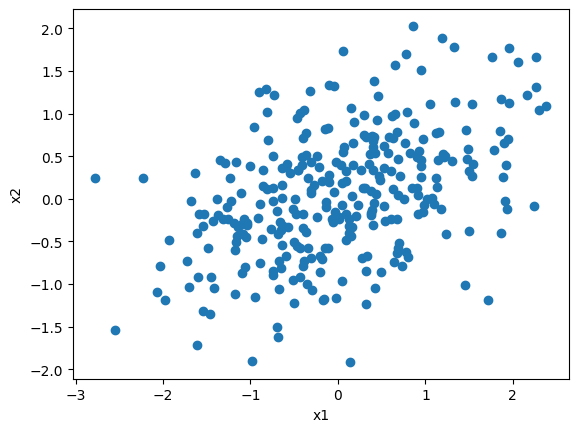

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

w = 0.3
n = 300
x1 = norm.rvs(loc=0, scale=1, size=n, random_state=0)
x2 = w * x1 + (1 - w) * norm.rvs(loc=0, scale=1, size=n, random_state=1)
X = np.append(x1.reshape(-1, 1), x2.reshape(-1, 1), axis=1)

fig, ax = plt.subplots()
ax.scatter(x1, x2)
ax.set(xlabel="x1", ylabel="x2")
fig.show()

データ行列$\boldsymbol{X} = (\boldsymbol{x}_1, ..., \boldsymbol{x}_N)^T$から平均ベクトルを引き算した行列を$\bar{\boldsymbol{X}}=(\boldsymbol{x}_1 - \bar{\boldsymbol{x}}, ..., \boldsymbol{x}_N - \bar{\boldsymbol{x}})^T$とおけば、共分散行列$\boldsymbol{\Sigma}$は

$$
\boldsymbol{\Sigma} = \operatorname{Var}[\bar{\boldsymbol{X}}]
= \frac{1}{N} \bar{\boldsymbol{X}}^T \bar{\boldsymbol{X}}
$$

と推定できる

In [2]:
x_bar = X.mean(axis=0)
X_bar = X - x_bar
Sigma = (1 / n) * X_bar.T @ X_bar
Sigma

array([[1.00140312, 0.32999238],
       [0.32999238, 0.54438079]])

### 固有値分解

分散最大化問題の解は

$$
\operatorname{Var}[\bar{\boldsymbol{X}}] \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

であったので、固有値問題を解いて$\lambda$と$\boldsymbol{a}_j$を推定していく。

In [3]:
lambdas, vectors = np.linalg.eig(Sigma)
print(f"""
λ={lambdas}
a1={vectors[:, 0].round(3)}
a2={vectors[:, 1].round(3)}
""")


λ=[1.17427995 0.37150396]
a1=[0.886 0.464]
a2=[-0.464  0.886]



主成分を表す固有ベクトルの傾きに直線をプロットすると以下の通り。

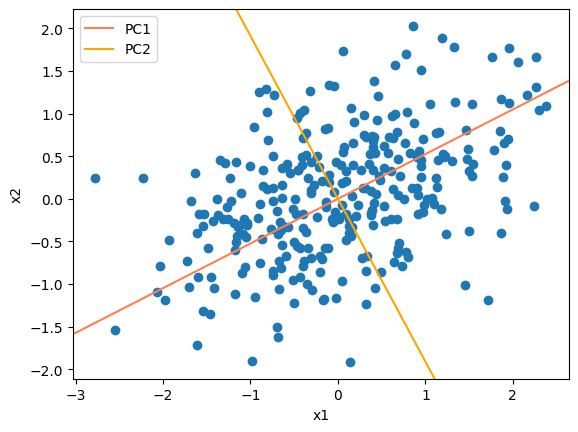

In [4]:
fig, ax = plt.subplots()
ax.scatter(x1, x2)
ax.axline(xy1=(0, 0), xy2=(vectors[:, 0]), color="coral", label="PC1")
ax.axline(xy1=(0, 0), xy2=(vectors[:, 1]), color="orange", label="PC2")
ax.set(xlabel="x1", ylabel="x2")
ax.legend()
fig.show()

推定できた$\boldsymbol{a}$の任意の次元数を使って線形変換$\boldsymbol{s} = \boldsymbol{\bar{X}} \boldsymbol{a}$を作る

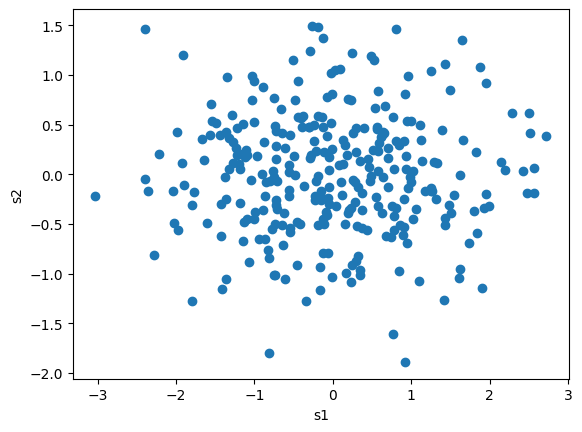

In [5]:
S = X_bar @ vectors

fig, ax = plt.subplots()
ax.scatter(S[:, 0], S[:, 1])
ax.set(xlabel="s1", ylabel="s2")
fig.show()

### 寄与率

次元削減を行う際は、元の分散を多く説明している（=固有値$\lambda_j$が大きい）次元を残すようにすればよい


In [6]:
# 固有値：第j主成分の分散
lambdas

array([1.17427995, 0.37150396])

In [7]:
# 寄与率：主成分の分散（固有値）の割合
lambdas / sum(lambdas)

array([0.7596663, 0.2403337])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

# 寄与率：主成分の分散（固有値）の割合
pca.explained_variance_ratio_

array([0.7596663, 0.2403337])

In [9]:
pca.transform(X)[:3]

array([[ 2.28345887,  0.61668615],
       [ 0.15906083, -0.49935839],
       [ 0.77927075, -0.56227195]])

In [10]:
S[:3]

array([[ 2.28345887,  0.61668615],
       [ 0.15906083, -0.49935839],
       [ 0.77927075, -0.56227195]])